<a href="https://colab.research.google.com/github/NophaieViscente/AnalisandoDadosBrasileirao/blob/main/Analise_de_Dados_Campeonato_Brasileiro_2000_at%C3%A9_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importando as bibliotecas e lendo os arqvuivos (.csv)

In [120]:
# Importando as bibliotecas que serão usadas.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
# Lendo os arquivos .csv e alocando em dois datasets
df_football = pd.read_csv('/content/drive/MyDrive/brazilian_football_championship_2000to2021.csv',encoding='latin1')
df_stats = pd.read_csv('/content/drive/MyDrive/stats_brazilian_football_championship2015to2021.csv',encoding='latin1')

### Agrupando os datasets. 



In [121]:
# Agrupando o dataset de estatísticas e o das partidas.
full_data = df_football.merge(df_stats,on='ID',how='left')
# Mostrando os arquivos agrupados.
full_data.head(-20)

,ID,Rodada,Data,Horário,Dia,Mandante_x,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor,Mandante_y,Chutes,Chutes a gol,Posse de bola,Passes,Precisão de passe,Faltas,Cartões amarelos,Cartões vermelhos,Impedimentos,Escanteios
0,1,1,2000-07-29,16h00,Sábado,Fluminense,Bahia,Fluminense,Maracanã,2,0,RJ,BA,RJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2000-07-29,16h00,Sábado,Vasco,Sport,Sport,São Januário,0,2,RJ,PE,PE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,2000-07-29,16h00,Sábado,Vitória,Palmeiras,Vitória,Barradão,4,1,ES,SP,ES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,2000-07-30,17h00,Domingo,Botafogo-RJ,Atlético-MG,-,Caio Martins,0,0,RJ,MG,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,2000-07-30,18h30,Domingo,Juventude,Flamengo,-,Alfredo Jaconi,1,1,RS,RJ,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10585,8313,38,2021-02-25,21:30,Quinta-Feira,Bragantino,Grêmio,Bragantino,Nabi Abi Chedid,1,0,SP,RS,SP,0.0,15.0,2.0,44%,370.0,79%,12.0,0.0,0.0,0.0,7.0
10586,8313,38,2021-02-25,21:30,Quinta-Feira,Bragantino,Grêmio,Bragantino,Nabi Abi Chedid,1,0,SP,RS,SP,1.0,19.0,6.0,56%,471.0,82%,24.0,4.0,0.0,1.0,3.0
10587,8313,38,2021-02-25,21:30,Quinta-Feira,Bragantino,Grêmio,Bragantino,Nabi Abi Chedid,1,0,SP,RS,SP,0.0,15.0,2.0,44%,370.0,79%,12.0,0.0,0.0,0.0,7.0
10588,8314,38,2021-02-25,21:30,Quinta-Feira,Atlético-MG,Palmeiras,Atlético-MG,Mineirão,2,0,MG,SP,MG,1.0,19.0,8.0,52%,451.0,89%,22.0,3.0,0.0,5.0,5.0


#### Editando dados para usar na análise.

In [211]:
# fazendo com que os dados 'Vencedor','Mandante_x','Visitante' fiquem no mesmo padrão .
full_data['Vencedor'] = full_data['Vencedor'].str.upper()
full_data['Mandante_x'] = full_data['Mandante_x'].str.upper()
full_data['Visitante'] = full_data['Visitante'].str.upper()  

In [212]:
# Trocando dados de empates nas colunas 'Estado Vencedor' e 'Vencedor'
full_data['Estado Vencedor'] = full_data['Estado Vencedor'].replace('-','Empate')
full_data['Vencedor'] = full_data['Vencedor'].replace('-','Empate')

In [213]:
# Trocando tipo dos dados de data . 
full_data['Data'] = pd.to_datetime(full_data['Data'],format='%Y-%m-%d')

In [214]:
# Criando um DataFrame 'vencedor' para ter a contagem de vencedores de forma organizada e sem dados repetidos.
full_data_norepeat = full_data.drop_duplicates(subset='ID',keep='first')
vencedor = pd.DataFrame()
winners = full_data_norepeat['Vencedor'].value_counts()
vencedor['winners'] = winners.index
vencedor['winner_count'] = winners.values
# Retirando os empates.
vencedor.drop(index=0,inplace=True)
vencedor.head()

,winners,winner_count
1,SÃO PAULO,366
2,SANTOS,339
3,CRUZEIRO,326
4,INTERNACIONAL,323
5,GRÊMIO,322


In [233]:
# Alocando dados de 'Vencedores mandantes' . 
homeWinners = full_data_norepeat.query('Vencedor == Mandante_x')
vencedorCasa = pd.DataFrame()
winners = homeWinners['Vencedor'].value_counts()
vencedorCasa['winners'] = winners.index
vencedorCasa['winner_count'] = winners.values
vencedorCasa.head()

,winners,winner_count
0,SÃO PAULO,230
1,SANTOS,229
2,GRÊMIO,223
3,ATHLÉTICO-PR,218
4,INTERNACIONAL,216


In [239]:
# Alocando dados de 'Vencedores visitantes' . 
awayWinners = full_data_norepeat.query('Vencedor == Visitante')
vencedorVisitante = pd.DataFrame()
winners = awayWinners['Vencedor'].value_counts()
vencedorVisitante['winners'] = winners.index
vencedorVisitante['winner_count'] = winners.values
vencedorVisitante.head()

,winners,winner_count
0,SÃO PAULO,136
1,CRUZEIRO,120
2,FLAMENGO,117
3,FLUMINENSE,113
4,CORINTHIANS,110


#### Funções mais usadas para a análise.

In [215]:
def graficoContagemVertical (dados, x, palette,tamanhoFigura, titulo, tamanhoFonteTitulo, tipoFonteTitulo,tamanhoTickLabels) :
  fig, ax = plt.subplots(figsize=tamanhoFigura)
  plt.title(titulo,fontdict={'fontsize':tamanhoFonteTitulo,'fontweight': tipoFonteTitulo})
  sns.countplot(data=dados,x=x,palette=palette)
  plt.tick_params(labelsize=tamanhoTickLabels)
  for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_color(None)
  for texto in ax.patches:
    altura = texto.get_height()
    ax.text(texto.get_x()+texto.get_width()/2.,
            altura ,
            '{:.0f}'.format(altura),
            ha="center",va='bottom')

def graficoContagemHorizontal (dados, y,x,orientacaoFigura,palette,tamanhoFigura, titulo, tamanhoFonteTitulo, tipoFonteTitulo,tamanhoTickLabels) :
  fig, ax = plt.subplots(figsize=tamanhoFigura)
  plt.title(titulo,fontdict={'fontsize':tamanhoFonteTitulo,'fontweight': tipoFonteTitulo})
  sns.barplot(data=dados,y=y,x=x,orient=orientacaoFigura,palette=palette)
  plt.tick_params(labelsize=tamanhoTickLabels)
  for axis in ['top', 'right', 'bottom']:
    ax.spines[axis].set_color(None)
  for valor in ax.patches :
    distancia = valor.get_width()
    ax.text(distancia,valor.get_y()+valor.get_height()/2.,
            '{:.0f}'.format(distancia),
            ha="left",va='center')

#### Analisando os dados

In [216]:
# Visualizando os dados . 
full_data.head(-20)

,ID,Rodada,Data,Horário,Dia,Mandante_x,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor,Mandante_y,Chutes,Chutes a gol,Posse de bola,Passes,Precisão de passe,Faltas,Cartões amarelos,Cartões vermelhos,Impedimentos,Escanteios
0,1,1,2000-07-29,16h00,Sábado,FLUMINENSE,BAHIA,FLUMINENSE,Maracanã,2,0,RJ,BA,RJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2000-07-29,16h00,Sábado,VASCO,SPORT,SPORT,São Januário,0,2,RJ,PE,PE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,2000-07-29,16h00,Sábado,VITÓRIA,PALMEIRAS,VITÓRIA,Barradão,4,1,ES,SP,ES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,2000-07-30,17h00,Domingo,BOTAFOGO-RJ,ATLÉTICO-MG,EMPATE,Caio Martins,0,0,RJ,MG,Empate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,2000-07-30,18h30,Domingo,JUVENTUDE,FLAMENGO,EMPATE,Alfredo Jaconi,1,1,RS,RJ,Empate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10585,8313,38,2021-02-25,21:30,Quinta-Feira,BRAGANTINO,GRÊMIO,BRAGANTINO,Nabi Abi Chedid,1,0,SP,RS,SP,0.0,15.0,2.0,44%,370.0,79%,12.0,0.0,0.0,0.0,7.0
10586,8313,38,2021-02-25,21:30,Quinta-Feira,BRAGANTINO,GRÊMIO,BRAGANTINO,Nabi Abi Chedid,1,0,SP,RS,SP,1.0,19.0,6.0,56%,471.0,82%,24.0,4.0,0.0,1.0,3.0
10587,8313,38,2021-02-25,21:30,Quinta-Feira,BRAGANTINO,GRÊMIO,BRAGANTINO,Nabi Abi Chedid,1,0,SP,RS,SP,0.0,15.0,2.0,44%,370.0,79%,12.0,0.0,0.0,0.0,7.0
10588,8314,38,2021-02-25,21:30,Quinta-Feira,ATLÉTICO-MG,PALMEIRAS,ATLÉTICO-MG,Mineirão,2,0,MG,SP,MG,1.0,19.0,8.0,52%,451.0,89%,22.0,3.0,0.0,5.0,5.0


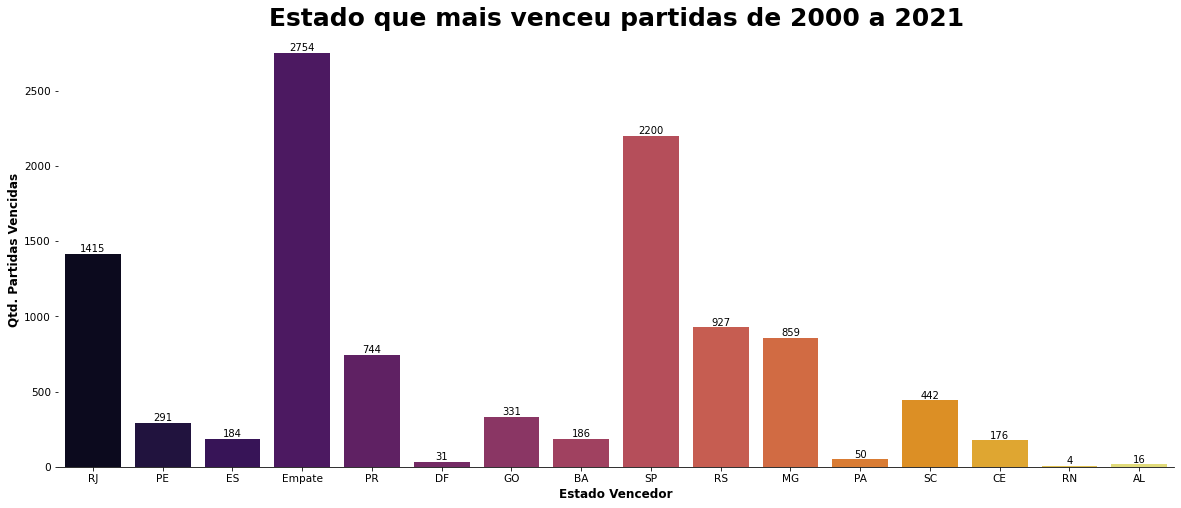

In [217]:
# Plotando gráfico para visualização do estado com maior número de vitórias.
graficoContagemVertical(full_data,x='Estado Vencedor',palette='inferno',tamanhoFigura=(20,8),titulo='Estado que mais venceu partidas de 2000 a 2021',
                tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',tamanhoTickLabels=10.5)
plt.ylabel('Qtd. Partidas Vencidas',fontdict={'fontsize':12,'fontweight':'semibold'})
plt.xlabel('Estado Vencedor',fontdict={'fontsize':12,'fontweight':'semibold'})
plt.show()

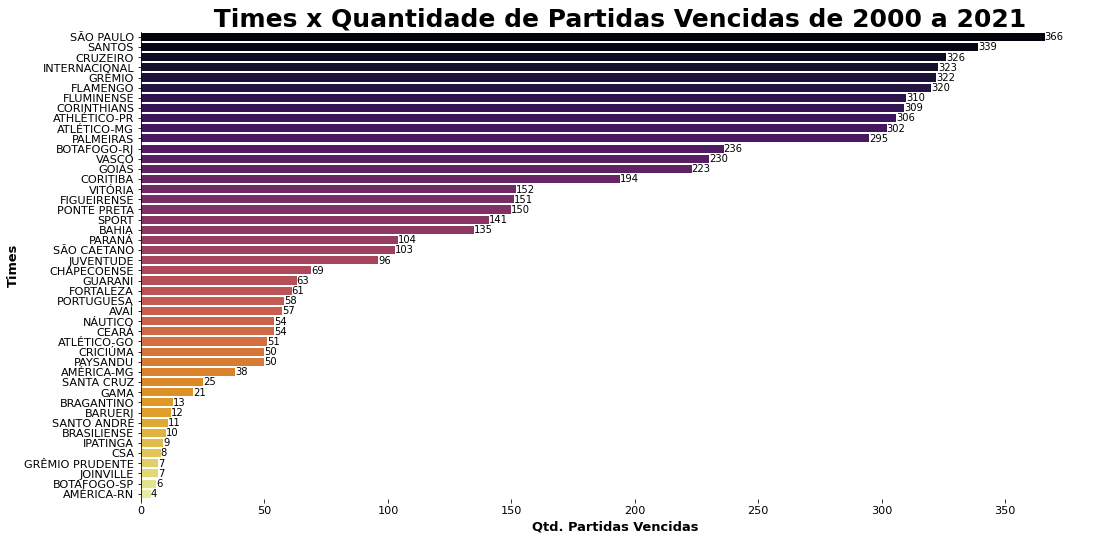

In [218]:
graficoContagemHorizontal(dados=vencedor,y='winners',x='winner_count',orientacaoFigura='h',palette='inferno',
                          tamanhoFigura=(17,8.59),titulo=' Times x Quantidade de Partidas Vencidas de 2000 a 2021',
                          tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',
                          tamanhoTickLabels=11.25)
plt.xlabel('Qtd. Partidas Vencidas',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.ylabel('Times',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.show()

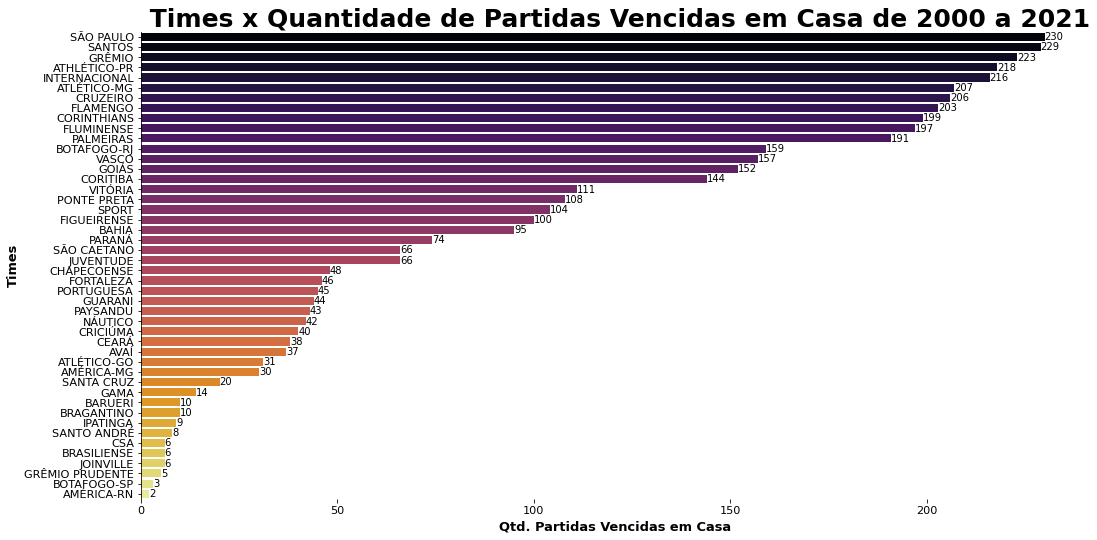

In [237]:
graficoContagemHorizontal(dados=vencedorCasa,y='winners',x='winner_count',orientacaoFigura='h',palette='inferno',
                          tamanhoFigura=(17,8.59),titulo=' Times x Quantidade de Partidas Vencidas em Casa de 2000 a 2021',
                          tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',
                          tamanhoTickLabels=11.25)
plt.xlabel('Qtd. Partidas Vencidas em Casa',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.ylabel('Times',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.show()

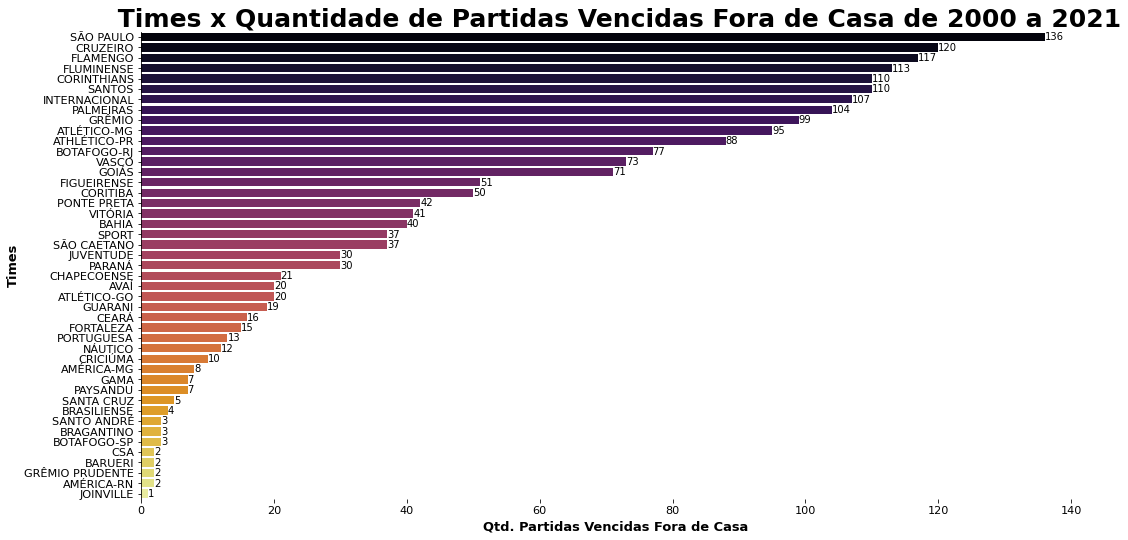

In [240]:
graficoContagemHorizontal(dados=vencedorVisitante,y='winners',x='winner_count',orientacaoFigura='h',palette='inferno',
                          tamanhoFigura=(17,8.59),titulo=' Times x Quantidade de Partidas Vencidas Fora de Casa de 2000 a 2021',
                          tamanhoFonteTitulo=25,tipoFonteTitulo='semibold',
                          tamanhoTickLabels=11.25)
plt.xlabel('Qtd. Partidas Vencidas Fora de Casa',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.ylabel('Times',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.show()